In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

**Загрузка данных (numeric версия)**

In [2]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric"
column_names = [f"feature_{i}" for i in range(1,25)] + ['target']
data = pd.read_csv(url, sep='\s+', header=None, names=column_names)


data['target'] = data['target'] - 1

print("Размер датасета:", data.shape)
data.head()

Размер датасета: (1000, 25)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,target
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,0
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,1
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,0
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,0
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,1


### 1.2. Анализ и очистка набора данных

**# Стандартные метрики**

In [3]:

data.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,target
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,32.711000,2.105000,3.384000,2.68200,2.845000,2.358000,35.546000,...,0.234000,0.103000,0.907000,0.041000,0.179000,0.713000,0.022000,0.2000,0.630000,0.300000
std,1.257638,12.058814,1.08312,28.252605,1.580023,1.208306,0.70808,1.103718,1.050209,11.375469,...,0.423584,0.304111,0.290578,0.198389,0.383544,0.452588,0.146757,0.4002,0.483046,0.458487
min,1.000000,4.000000,0.00000,2.000000,1.000000,1.000000,1.00000,1.000000,1.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,1.000000,12.000000,2.00000,14.000000,1.000000,3.000000,2.00000,2.000000,1.000000,27.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
50%,2.000000,18.000000,2.00000,23.000000,1.000000,3.000000,3.00000,3.000000,2.000000,33.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,0.000000
75%,4.000000,24.000000,4.00000,40.000000,3.000000,5.000000,3.00000,4.000000,3.000000,42.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,1.000000
max,4.000000,72.000000,4.00000,184.000000,5.000000,5.000000,4.00000,4.000000,4.000000,75.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000


**Проверка на пропуски и дубликаты**

Пропуски:
 0
Дубликаты: 0


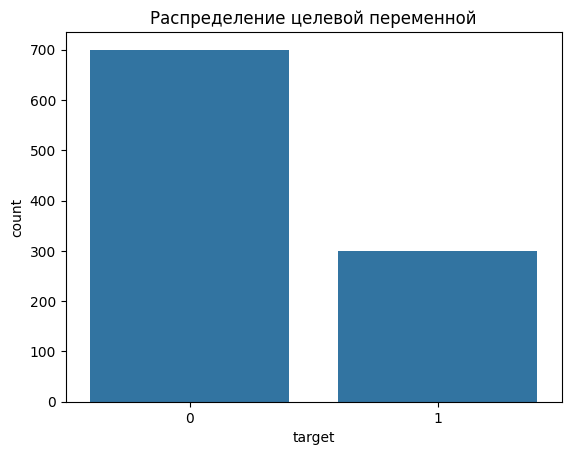

target
0    0.7
1    0.3
Name: proportion, dtype: float64


In [4]:

print("Пропуски:\n", data.isnull().sum().sum())
print("Дубликаты:", data.duplicated().sum())

# Баланс классов
sns.countplot(x='target', data=data)
plt.title('Распределение целевой переменной')
plt.show()

print(data['target'].value_counts(normalize=True))

**Стандартизация признаков**

In [5]:

scaler = StandardScaler()
features = data.drop('target', axis=1)
target = data['target']

features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

data_clean = pd.concat([features_scaled, target.reset_index(drop=True)], axis=1)
data_clean.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,target
0,-1.254566,-1.236478,1.344014,-0.733432,1.833169,1.338078,0.449326,1.046987,-1.293723,2.766456,...,-0.552705,-0.338862,0.320212,-0.206768,-0.466933,0.634448,-0.149983,-0.5,0.766356,0
1,-0.459026,2.248194,-0.503428,0.966377,-0.699707,-0.317959,-0.963650,-0.765977,-1.293723,-1.191404,...,-0.552705,-0.338862,0.320212,-0.206768,-0.466933,0.634448,-0.149983,-0.5,0.766356,1
2,1.132053,-0.738668,1.344014,-0.414718,-0.699707,0.510060,0.449326,0.140505,-1.293723,1.183312,...,-0.552705,-0.338862,0.320212,-0.206768,-0.466933,0.634448,-0.149983,2.0,-1.304877,0
3,-1.254566,1.750384,-0.503428,1.639217,-0.699707,0.510060,0.449326,1.046987,-0.341055,0.831502,...,-0.552705,-0.338862,-3.122929,-0.206768,-0.466933,-1.576173,-0.149983,-0.5,0.766356,0
4,-1.254566,0.256953,0.420293,0.576837,-0.699707,-0.317959,0.449326,1.046987,1.564281,1.535122,...,1.809283,-0.338862,0.320212,-0.206768,-0.466933,-1.576173,-0.149983,-0.5,0.766356,1


### 1.3. Обзор ансамблевых методов машинного обучения

Ансамблевые методы — это подходы, объединяющие несколько моделей для повышения точности и устойчивости.

Основные типы:
- **Bagging** (например, Random Forest): параллельное обучение независимых моделей на бутстрап-выборках, голосование.
- **Boosting** (например, Gradient Boosting): последовательное обучение, каждая новая модель исправляет ошибки предыдущих.
- **Stacking**: обучение мета-модели на предсказаниях базовых моделей.

Эти методы хорошо подходят для кредитного скоринга, так как справляются с несбалансированными данными и нелинейностями.

Далее будут использованы: Random Forest (bagging), Gradient Boosting (boosting) и Stacking.

## 2. ПРОЕКТИРОВАНИЕ И РЕАЛИЗАЦИЯ

### 2.1. Создание нужных моделей

In [6]:
# Базовые модели
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
gb = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1)

# Stacking
estimators = [('rf', rf), ('gb', gb)]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)

models = {'Random Forest': rf, 'Gradient Boosting': gb, 'Stacking': stack}

### 2.2. Формирование обучающей и тестирующей выборок

In [7]:
X = features_scaled
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Обучающая выборка:", X_train.shape)
print("Тестовая выборка:", X_test.shape)

Обучающая выборка: (700, 24)
Тестовая выборка: (300, 24)


### 2.3. Обучение моделей и предсказания

**Обучение и предсказания**

In [8]:

predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:, 1]
    predictions[name] = (pred, pred_proba)
    print(f"{name} обучена.")

Random Forest обучена.
Gradient Boosting обучена.
Stacking обучена.


**Визуализация confusion matrix для каждой модели**

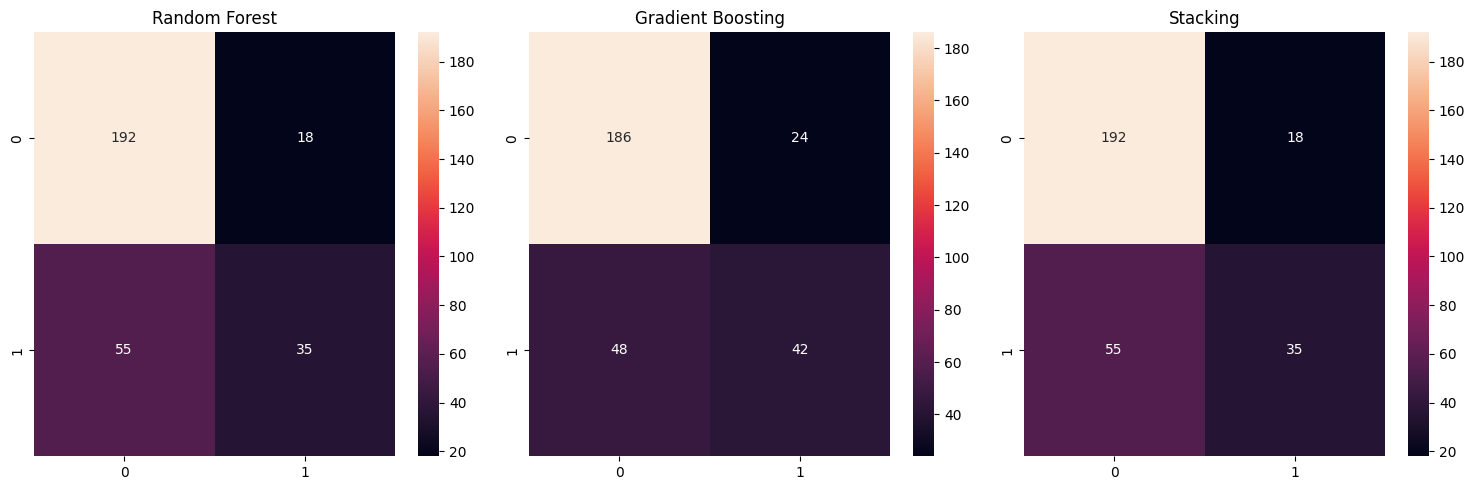

In [9]:

fig, axes = plt.subplots(1, 3, figsize=(15,5))
for i, (name, _) in enumerate(models.items()):
    cm = confusion_matrix(y_test, predictions[name][0])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i])
    axes[i].set_title(name)
plt.tight_layout()
plt.show()

## 3. ТЕСТИРОВАНИЕ

### 3.1. Расчёт эффективности

In [10]:
results = pd.DataFrame(columns=['Accuracy', 'AUC', 'Report'])

for name in models.keys():
    acc = accuracy_score(y_test, predictions[name][0])
    auc = roc_auc_score(y_test, predictions[name][1])
    report = classification_report(y_test, predictions[name][0])
    results.loc[name] = [acc, auc, report]
    print(name)
    print(classification_report(y_test, predictions[name][0]))
    print("AUC:", auc)
    print("-"*50)

results[['Accuracy', 'AUC']]

Random Forest
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       210
           1       0.66      0.39      0.49        90

    accuracy                           0.76       300
   macro avg       0.72      0.65      0.66       300
weighted avg       0.74      0.76      0.74       300

AUC: 0.7905291005291005
--------------------------------------------------
Gradient Boosting
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       210
           1       0.64      0.47      0.54        90

    accuracy                           0.76       300
   macro avg       0.72      0.68      0.69       300
weighted avg       0.75      0.76      0.75       300

AUC: 0.7877248677248677
--------------------------------------------------
Stacking
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       210
           1       0.66      0.39      0.49   

,Accuracy,AUC
Random Forest,0.756667,0.790529
Gradient Boosting,0.760000,0.787725
Stacking,0.756667,0.797513


### 3.2. Оптимизация моделей

In [11]:
# Пример оптимизации Random Forest с GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

print("Лучшие параметры:", grid.best_params_)
print("Лучший AUC на кросс-валидации:", grid.best_score_)

# Обучим оптимизированную модель
rf_opt = grid.best_estimator_
rf_opt.fit(X_train, y_train)
pred_opt = rf_opt.predict(X_test)
proba_opt = rf_opt.predict_proba(X_test)[:, 1]

print("Оптимизированный RF - Accuracy:", accuracy_score(y_test, pred_opt))
print("Оптимизированный RF - AUC:", roc_auc_score(y_test, proba_opt))

Лучшие параметры: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Лучший AUC на кросс-валидации: 0.7778425655976676
Оптимизированный RF - Accuracy: 0.7566666666666667
Оптимизированный RF - AUC: 0.7905291005291005


In [12]:
# Сравнение AUC до и после
auc_before = roc_auc_score(y_test, predictions['Random Forest'][1])
auc_after = roc_auc_score(y_test, proba_opt)
print(f"AUC до оптимизации: {auc_before:.4f}")
print(f"AUC после оптимизации: {auc_after:.4f}")

AUC до оптимизации: 0.7905
AUC после оптимизации: 0.7905
